In [1]:
#2016 Agency Spending Notebook
import requests
import json
import numpy as np
import pandas as pd
import zipfile as z
import matplotlib.pyplot as plt

In [2]:
#add the directories to a list for later on
zip_directories = ['2014_Contracts.zip', '2016_Contracts.zip', '2018_Contracts.zip']

#gets files from from zipfiles
#spending_14_folder = z.ZipFile(zip_directories[0], 'r')
spending_16_folder = z.ZipFile(zip_directories[1], 'r')
#spending_18_folder = z.ZipFile(zip_directories[2], 'r')

#spending_folders = [spending_14_folder, spending_16_folder, spending_18_folder]

In [3]:
spending_16_list = []
spending_16_csv_list = []
counter = 0

with spending_16_folder:
    files = spending_16_folder.namelist()
    for file in files:
        spending_16_list.append(spending_16_folder.open(file))
    for n in range(0,len(spending_16_list)):
        current_16_csv = pd.read_csv(spending_16_list[0])
        del spending_16_list[0]
        spending_16_csv = current_16_csv[['awarding_agency_name','funding_agency_name', 'recipient_state_code', 'recipient_state_name', 'primary_place_of_performance_state_code', 'total_dollars_obligated', 'current_total_value_of_award','potential_total_value_of_award']].dropna()
        spending_16_csv_list.append(spending_16_csv)
        
spending_16_clean = pd.concat(spending_16_csv_list)
del spending_16_csv_list

C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,39,49,53,55,56,63,73,95,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,39,49,53,55,56,63,81,82,95,115,116,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,21,39,49,53,55,56,63,73,95,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,21,39,49,53,55,56,63,95,115,116) have mixed type

In [4]:
spending_16_clean.head()
spending_states_grouped = spending_16_clean.groupby(["recipient_state_code", "funding_agency_name"]).sum()
spending_states_grouped.head()

total_dollars_obligated  \
recipient_state_code funding_agency_name                                                 
AK                   AFRICAN DEVELOPMENT FOUNDATION (EOP)                 1.090130e+05   
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)             5.096954e+07   
                     DEPARTMENT OF AGRICULTURE (USDA)                     8.144651e+07   
                     DEPARTMENT OF COMMERCE (DOC)                         5.911075e+06   
                     DEPARTMENT OF DEFENSE (DOD)                          2.110179e+09   

                                                               current_total_value_of_award  \
recipient_state_code funding_agency_name                                                      
AK                   AFRICAN DEVELOPMENT FOUNDATION (EOP)                      1.090130e+05   
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)                  5.174412e+07   
                     DEPARTMENT OF AGRICULTURE (USDA)                          8.144651e+07   
                     DEPARTMENT OF COMMERCE (DOC)                              5.911075e+06   
                     DEPARTMENT OF DEFENSE (DOD)                               2.276244e+09   

                                                               potential_total_value_of_award  
recipient_state_code funding_agency_name                                                       
AK                   AFRICAN DEVELOPMENT FOUNDATION (EOP)                        1.090130e+05  
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)                    5.405441e+07  
                     DEPARTMENT OF AGRICULTURE (USDA)                            8.280715e+07  
                     DEPARTMENT OF COMMERCE (DOC)                                5.965775e+06  
                     DEPARTMENT OF DEFENSE (DOD)                                 2.298435e+09

<function matplotlib.pyplot.show(*args, **kw)>

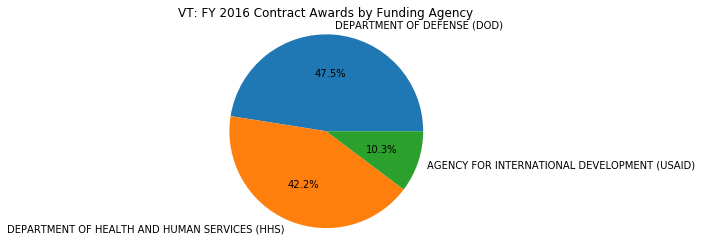

In [26]:
vt_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "VT"]
vt_16_no_dod = vt_16#.loc[vt_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
vt_16_agency = vt_16_no_dod.groupby('funding_agency_name').sum()
vt_16_agency = vt_16_agency.reset_index()
vt_16_agency = vt_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_vt_6_16 = vt_16_agency.head(3)
plt.pie(top_vt_6_16['total_dollars_obligated'], labels = [value for value in top_vt_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("VT: FY 2016 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

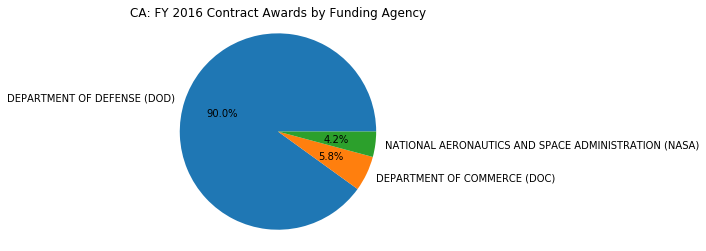

In [25]:
ca_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "CA"]
ca_16_no_dod = ca_16#.loc[ca_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ca_16_agency = ca_16_no_dod.groupby('funding_agency_name').sum()
ca_16_agency = ca_16_agency.reset_index()
ca_16_agency = ca_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ca_6_16 = ca_16_agency.head(3)
plt.pie(top_ca_6_16['total_dollars_obligated'], labels = [value for value in top_ca_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("CA: FY 2016 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

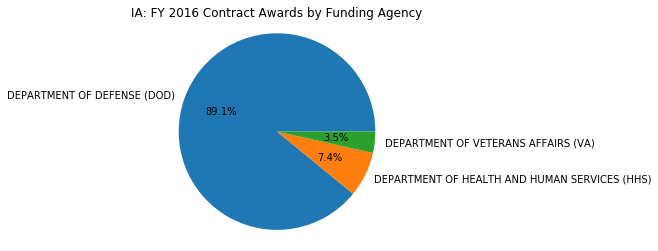

In [24]:
ia_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "IA"]
ia_16_no_dod = ia_16#.loc[ia_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ia_16_agency = ia_16_no_dod.groupby('funding_agency_name').sum()
ia_16_agency = ia_16_agency.reset_index()
ia_16_agency = ia_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ia_6_16 = ia_16_agency.head(3)
plt.pie(top_ia_6_16['total_dollars_obligated'], labels = [value for value in top_ia_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("IA: FY 2016 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

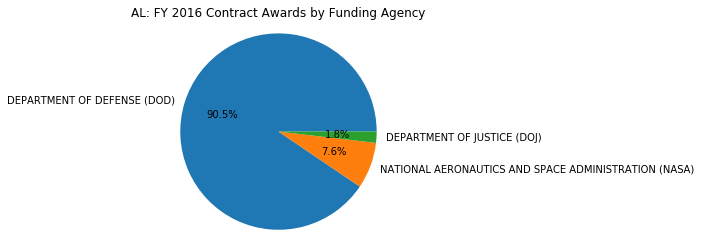

In [22]:
al_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "AL"]
al_16_no_dod = al_16#.loc[al_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
al_16_agency = al_16_no_dod.groupby('funding_agency_name').sum()
al_16_agency = al_16_agency.reset_index()
al_16_agency = al_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_al_6_16 = al_16_agency.head(3)
plt.pie(top_al_6_16['total_dollars_obligated'], labels = [value for value in top_al_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("AL: FY 2016 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

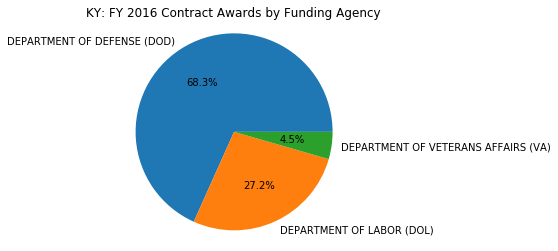

In [23]:
ky_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "KY"]
ky_16_no_dod = ky_16#.loc[ky_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ky_16_agency = ky_16_no_dod.groupby('funding_agency_name').sum()
ky_16_agency = ky_16_agency.reset_index()
ky_16_agency = ky_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ky_6_16 = ky_16_agency.head(3)
plt.pie(top_ky_6_16['total_dollars_obligated'], labels = [value for value in top_ky_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("KY: FY 2016 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

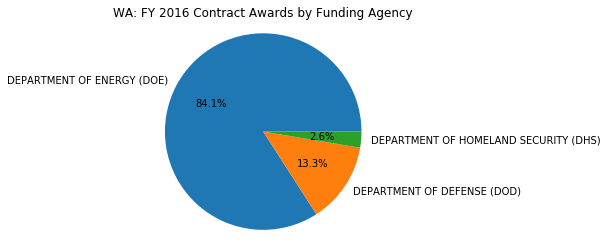

In [14]:
wa_16 = spending_16_clean.loc[spending_16_clean["recipient_state_code"] == "WA"]
wa_16_no_dod = wa_16#.loc[wa_16['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
wa_16_agency = wa_16_no_dod.groupby('funding_agency_name').sum()
wa_16_agency = wa_16_agency.reset_index()
wa_16_agency = wa_16_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_wa_6_16 = wa_16_agency.head(3)
plt.pie(top_wa_6_16['total_dollars_obligated'], labels = [value for value in top_wa_6_16['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("WA: FY 2016 Contract Awards by Funding Agency")
plt.show